## Compare Different Coverage Distributions

In [1]:
ROOT_DIR = "../.."

In [12]:
from numba import cuda
cuda.select_device(0)
cuda.close()

In [3]:
import os
import h5py
import numpy as np   

import sys
sys.path.append(ROOT_DIR) 
from cryoem.projections import RotationMatrix
from cryoem.conversions import euler2quaternion, d_q
from cryoem.plots import plot_angles_histogram, plot_quaternions_histogram, plot_distances_histogram

In [4]:
import tensorflow as tf
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15225816626165151517
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2488608247863660383
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10355243206640403887
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3427794944
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11322707187662172196
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


### Read data

Read data that we previously generated, covering different coverages:
- full sphere coverage with uniform distribution on euler angles (non-uniform)
- full sphere coverage with uniform distribution on $\mathbb{S}^2$-sphere (uniform)
- half sphere coverage with uniform distribution on euler angles
- quarter sphere coverage with uniform distribution on $\mathbb{S}^2$-sphere

In [5]:
# full sphere coverage with non-uniform distribution
projections_filename = "../../data/5a1a_full.h5"

# load structures
data_full_5k = h5py.File(projections_filename, 'r')
angles1 = np.array(data_full_5k['Angles'], dtype=np.float32)
projections1 = np.array(data_full_5k['Projections'], dtype=np.float32)
label1 = "Full-coverage, Euler uniform"


print(f"{angles1.shape[0]} projections of images with dimension {projections1.shape[1:]} pixels")
print(f"{angles1.shape[0]} sets of {angles1.shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (275, 275) pixels
5000 sets of 3 ground truth angles of corresponding projection images


In [6]:
# full sphere coverage with uniform distribution
projections_filename = "../../data/5j0n_full_uniformS2.h5"

# load structures
data_full_5k_uniform = h5py.File(projections_filename, 'r')
angles2 = np.array(data_full_5k_uniform['Angles'], dtype=np.float32)
projections2 = np.array(data_full_5k_uniform['Projections'], dtype=np.float32)
label2 = r"Full-coverage, $\mathbf{SO}(3)$ uniform"

print(f"{angles2.shape[0]} projections of images with dimension {projections2.shape[1:]} pixels")
print(f"{angles2.shape[0]} sets of {angles2.shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (116, 116) pixels
5000 sets of 3 ground truth angles of corresponding projection images


In [7]:
# half sphere coverage with non-uniform distribution
projections_filename = "../../data/5j0n_half.h5"

# load structures
data_half_5k = h5py.File(projections_filename, 'r')
angles3 = np.array(data_half_5k['Angles'], dtype=np.float32)
projections3 = np.array(data_half_5k['Projections'], dtype=np.float32)
label3 = "Half-sphere, Euler uniform"

print(f"{angles3.shape[0]} projections of images with dimension {projections3.shape[1:]} pixels")
print(f"{angles3.shape[0]} sets of {angles3.shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (116, 116) pixels
5000 sets of 3 ground truth angles of corresponding projection images


In [8]:
# quarter sphere coverage with uniform distribution
projections_filename = "../../data/5a1a_quarter.h5"

# load structures
data_quarter_5k = h5py.File(projections_filename, 'r')
angles4 = np.array(data_quarter_5k['Angles'], dtype=np.float32)
projections4 = np.array(data_quarter_5k['Projections'], dtype=np.float32)
label4 = r"Quarter-sphere, $\mathbf{SO}(3)$ uniform"

print(f"{angles4.shape[0]} projections of images with dimension {projections4.shape[1:]} pixels")
print(f"{angles4.shape[0]} sets of {angles4.shape[1]} ground truth angles of corresponding projection images")

5000 projections of images with dimension (275, 275) pixels
5000 sets of 3 ground truth angles of corresponding projection images


### Angle coverage histogram

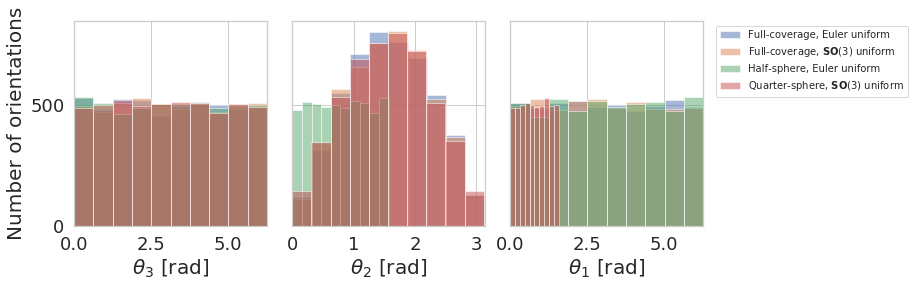

In [9]:
plot_angles_histogram([angles1, angles2, angles3, angles4], 
                      [label1, label2, label3, label4], 
                      plot_settings=dict(legend_size=10, alpha=0.5))

### Quaternion coverage histogram

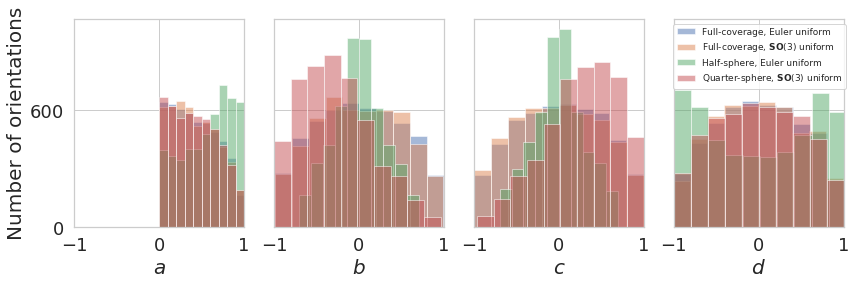

In [10]:
plot_quaternions_histogram([euler2quaternion(angles1), euler2quaternion(angles2), euler2quaternion(angles3), euler2quaternion(angles4)], 
                           [label1, label2, label3, label4], 
                           plot_settings=dict(legend_size=9, alpha=0.5))

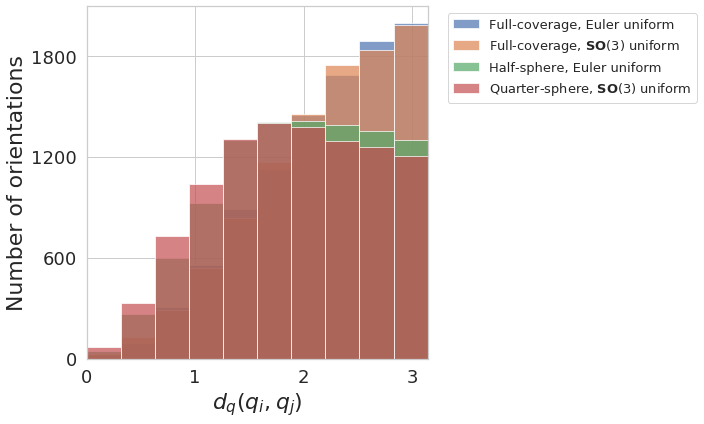

In [11]:
plot_distances_histogram([angles1, angles2, angles3, angles4], 
                         [label1, label2, label3, label4], 
                         plot_settings=dict(legend_size=13, alpha=0.7))